# Analyse descriptives des données "Openfoodfacts"

In [1]:
# importation des librairies nécessaires

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import scipy.stats as stats
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = 'openfoodfacts_clean.csv'

In [3]:
df = pd.read_csv(filepath)
df.head(3)

,code,product_name,brands,nutriscore_score,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,0000000001281,Tarte noix de coco,Crous Resto'.Crous,14.0,381.0,22.0,15.5,27.3,21.9,4.6,0.100,0.0400
1,0000000001885,Compote de poire,Crous,-2.0,157.0,0.0,0.0,36.0,27.0,0.6,0.000,0.0000
2,0000000005470,BAguette bressan,Crousresto',-4.0,160.0,2.2,0.5,25.2,0.6,9.5,0.358,0.1432


In [13]:
df.shape

(332627, 12)

In [6]:
print('Nombre de produits :', len(df['product_name'].unique()))

Nombre de produits : 245112


In [7]:
print('Nombre de marques :', len(df['brands'].unique()))

Nombre de marques : 66801


# Analyses univariées

## Description de la distribution des variables

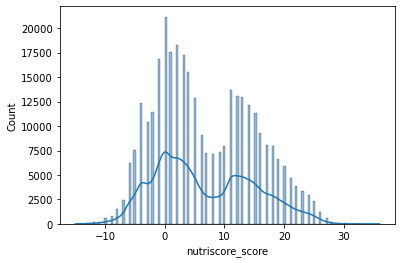

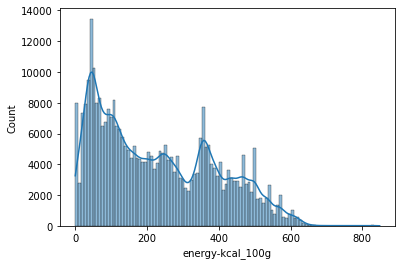

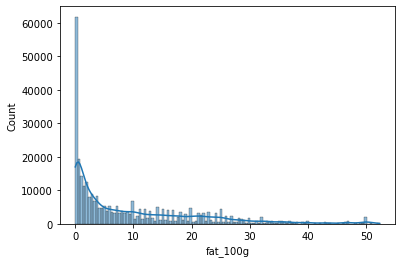

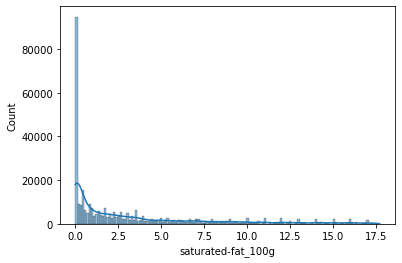

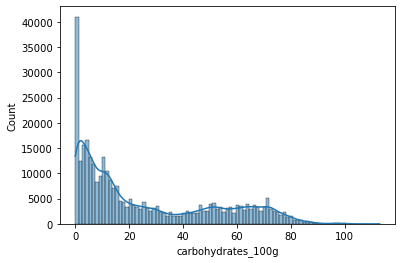

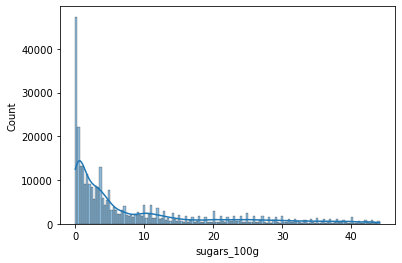

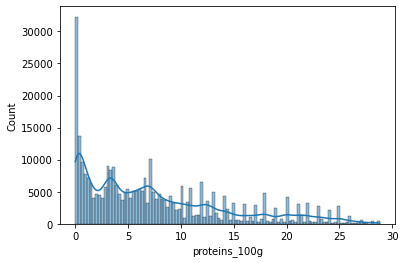

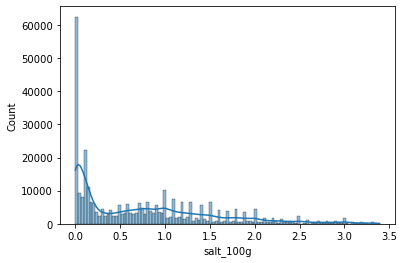

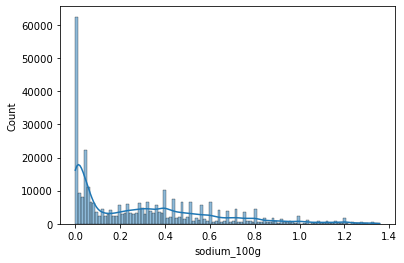

In [8]:
for var in df.columns:
    if df[var].dtypes == 'float64':
        sns.histplot(x=var, data=df, kde=True)
        plt.show()

In [9]:
pg.normality(df, method='normaltest', alpha=0.05)

,W,pval,normal
nutriscore_score,37849.952456,0.0,False
energy-kcal_100g,48939.551470,0.0,False
fat_100g,73660.410873,0.0,False
saturated-fat_100g,86852.935399,0.0,False
carbohydrates_100g,51932.778913,0.0,False
sugars_100g,78459.947457,0.0,False
proteins_100g,37801.305614,0.0,False
salt_100g,41938.951627,0.0,False
sodium_100g,41940.920380,0.0,False


In [14]:
pg.homoscedasticity(df, method='levene', alpha=0.05)

,W,pval,equal_var
levene,0.513893,1.0,True


## Analyses descriptives des variables

### Analyses graphiques des variables

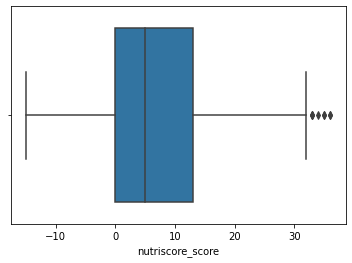

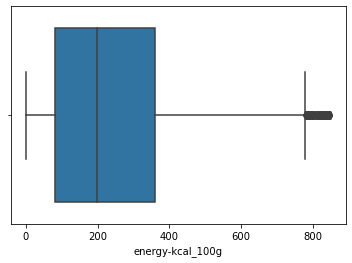

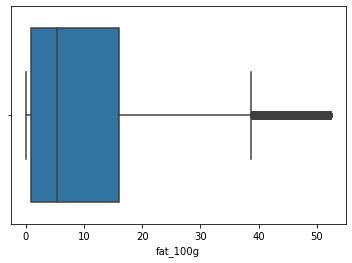

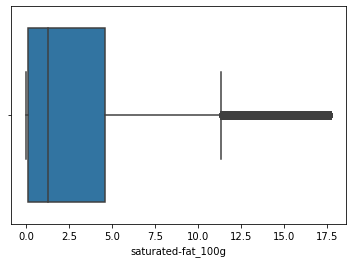

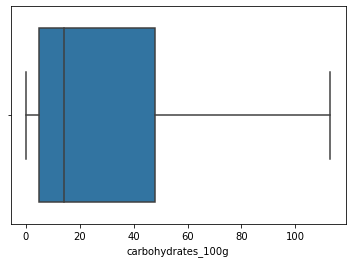

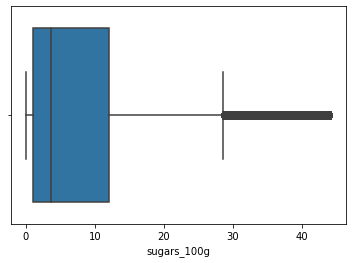

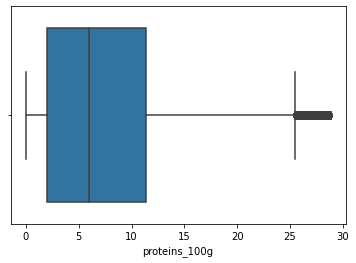

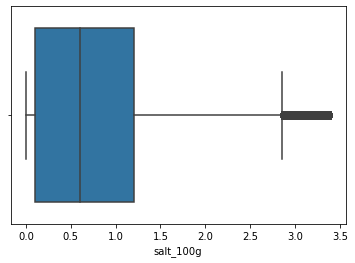

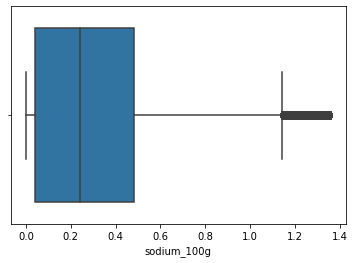

In [10]:
for var in df.columns:
    if df[var].dtypes == 'float64':
        sns.boxplot(x=var, data=df)
        plt.show()

### Analyses statistiques des variables

In [11]:
df.describe()

,nutriscore_score,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
count,332627.000000,332627.000000,332627.000000,332627.000000,332627.000000,332627.000000,332627.000000,332627.000000,332627.000000
mean,6.713541,227.709895,9.979726,3.184379,26.049344,8.736099,7.581436,0.764126,0.305652
std,8.254985,164.712476,11.496042,4.211534,25.435364,10.946360,6.815515,0.766564,0.306629
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.900000,0.100000,4.800000,1.000000,2.000000,0.100000,0.040000
50%,5.000000,198.000000,5.290000,1.300000,14.300000,3.600000,6.000000,0.600000,0.240000
75%,13.000000,359.000000,16.050000,4.600000,48.080000,12.000000,11.400000,1.200000,0.480000
max,36.000000,848.000000,52.333333,17.700000,113.000000,44.099998,28.800000,3.392857,1.357143


# Analyses bivariées des variables